# Bitcoin - ドル 週足 メジアン統計

In [1]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pingouin as pg
import seaborn as sns
import yfinance as yf

In [2]:
code = 'BTC-USD'
symbol = code
ticker = yf.Ticker(symbol)

In [3]:
# 週足で過去 5 年分のデータを取得
df0 = ticker.history(period='5y', interval='1wk')

# ローソク足のチャートには、そのうち過去 3 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_3y =  datetime.timedelta(days=365 * 3)
df = df0[df0.index >= dt_last - tdelta_3y]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-25 00:00:00+00:00,39472.605469,40713.890625,37585.789062,38469.093750,216681007567,0.0,0.0
2022-05-02 00:00:00+00:00,38472.187500,39902.949219,33878.964844,34059.265625,239044762282,0.0,0.0
2022-05-09 00:00:00+00:00,34060.015625,34222.074219,26350.490234,31305.113281,357800928090,0.0,0.0
2022-05-16 00:00:00+00:00,31304.375000,31305.341797,28708.955078,30323.722656,196429842104,0.0,0.0
2022-05-23 00:00:00+00:00,30309.396484,30590.585938,28261.906250,29445.957031,212594819496,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-24 00:00:00+00:00,86070.929688,88758.726562,81573.250000,82334.523438,181637739548,0.0,0.0
2025-03-31 00:00:00+00:00,82336.062500,88466.953125,77097.742188,78214.484375,237449686690,0.0,0.0
2025-04-07 00:00:00+00:00,78221.335938,86015.187500,74436.679688,83684.976562,363220466107,0.0,0.0


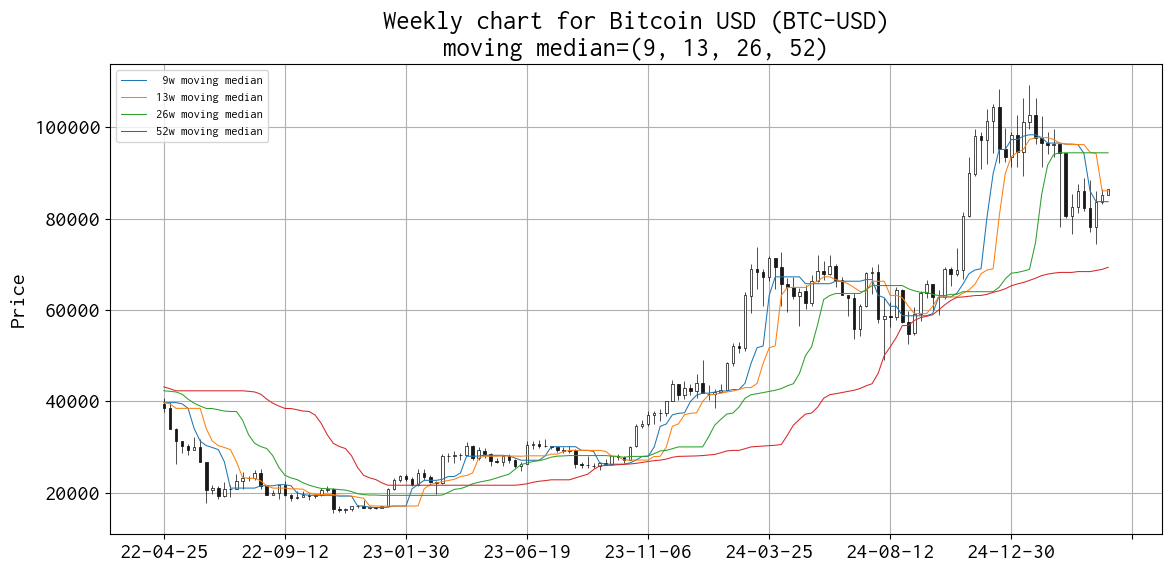

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()
apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=False,
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmoving median=(9, 13, 26, 52)' % (ticker.info['longName'], symbol))

ax.legend(loc='best', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('report_weekly_chart_robust_%s.png' % code)
plt.show()

In [5]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-21 00:00:00+00:00,85169.609375,86393.898438,85169.609375,86393.898438,17510664192,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-04-14 00:00:00+00:00    85063.414062
2025-04-21 00:00:00+00:00    86393.898438
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-04-14 00:00:00+00:00            NaN
2025-04-21 00:00:00+00:00    1330.484375
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(9).median().tail(1)

Date
2025-04-21 00:00:00+00:00    83684.976562
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(13).median().tail(1)

Date
2025-04-21 00:00:00+00:00    86054.375
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(26).median().tail(1)

Date
2025-04-21 00:00:00+00:00    94368.394531
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(52).median().tail(1)

Date
2025-04-21 00:00:00+00:00    69324.847656
Name: Close, dtype: float64

## Robust Bollinger bands

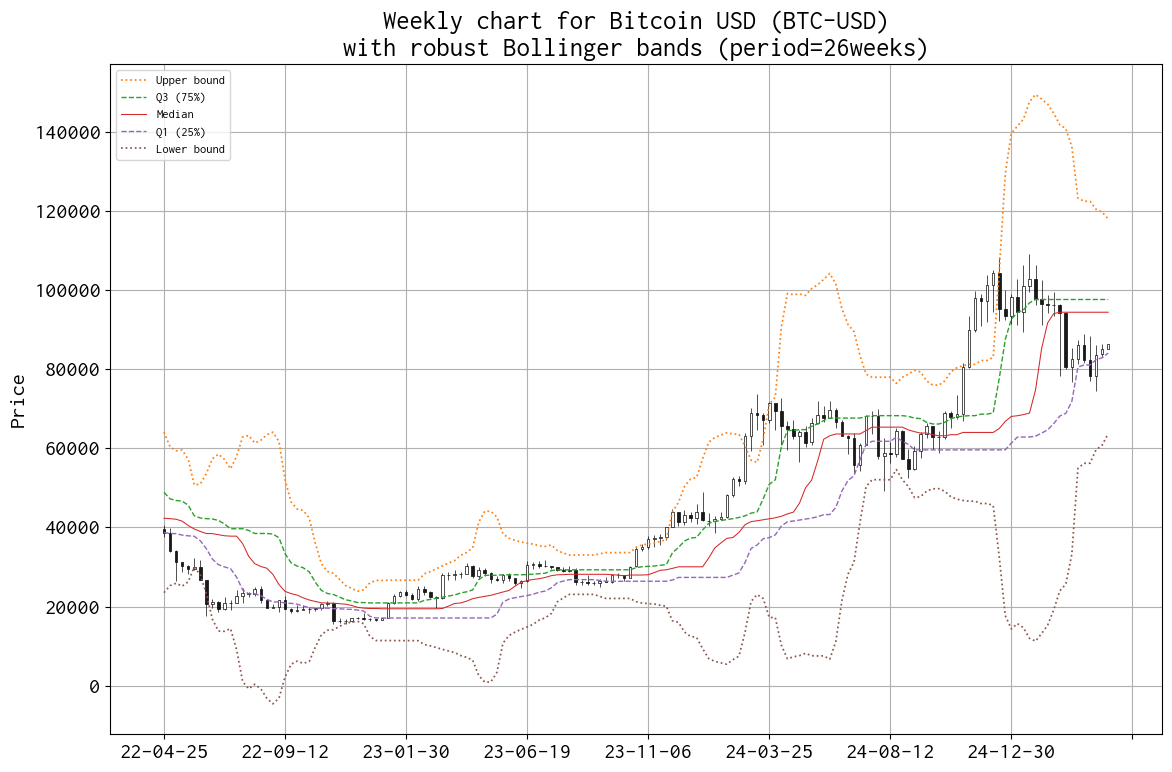

In [12]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 26
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]

mpf.plot(df, type='candle', style='default', addplot=apds, datetime_format='%y-%m-%d', xrotation=0, ax=ax)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

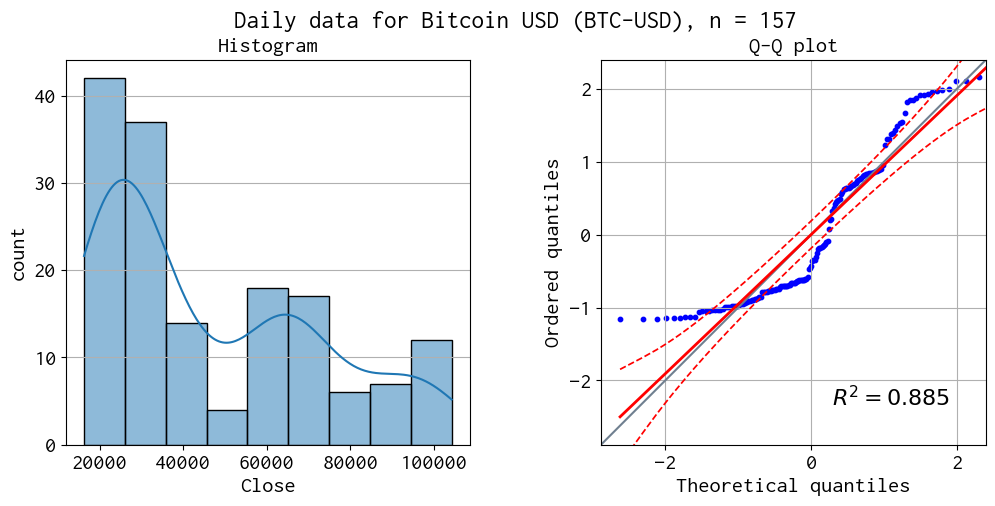

In [13]:
plt.rcParams['font.size'] = 16

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('Daily data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig('report_weekly_histogram_qqplot_%s.png' % code)
plt.show()